# Running EMPIARreader

Example notebook to run empiarreader using Python commands.

In [41]:
from empiarreader import EmpiarSource, EmpiarCatalog
import matplotlib.pyplot as plt 

test_entry = 10943
test_directory = "data/MotionCorr/job003/Tiff/EER/Images-Disc1/GridSquare_11149061/Data"

EMPIARreader can load the dataset from an EmpiarSource, using the entry number and the directory of the images. In this case, we also specify that we want the mrc files.

In [12]:
ds = EmpiarSource(
        test_entry,
        directory=test_directory,
        filename=".*EER\\.mrc",
        regexp=True,
    )

ds

empiar:
  args:
    directory: data/MotionCorr/job003/Tiff/EER/Images-Disc1/GridSquare_11149061/Data
    empiar_index: 10943
    filename: .*EER\.mrc
    regexp: true
  description: ''
  driver: empiarreader.empiar.empiar.EmpiarSource
  metadata: {}


The dataset is loaded lazily, so the images are loaded one at a time when read_partition is called. In this case, we call partition number 10.

In [44]:
part = ds.read_partition(10)
part

<xarray.DataArray (y: 4096, x: 4096)>
array([[1.275, 1.767, 1.378, ..., 3.824, 3.062, 3.447],
       [2.566, 2.174, 1.81 , ..., 3.91 , 3.316, 4.133],
       [8.71 , 2.22 , 2.363, ..., 4.145, 3.604, 3.492],
       ...,
       [4.17 , 4.105, 3.896, ..., 3.602, 3.441, 3.996],
       [3.812, 3.564, 3.941, ..., 3.719, 3.145, 3.734],
       [4.08 , 3.922, 3.68 , ..., 3.24 , 3.508, 5.16 ]], dtype=float16)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 4089 4090 4091 4092 4093 4094 4095
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 4089 4090 4091 4092 4093 4094 4095
Attributes:
    filename:    https://ftp.ebi.ac.uk/empiar/world_availability/10943/data/M...
    voxel_size:  (0.824, 0.824, 1.)

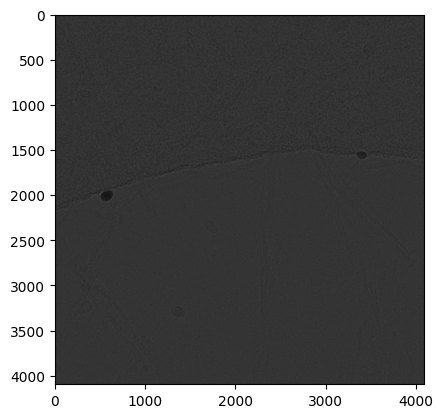

In [43]:
image_part = part.data

plt.imshow(
    image_part,cmap='gray',
)


In [ ]:
cat = EmpiarCatalog(test_entry)

list(cat.keys())

ds_from_cat = cat[list(cat.keys())[0]]